In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'TSLA'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-11 21:00:00,2020-09-11 21:00:00,373.5000,373.60,374.17,374.250,139431
2020-09-14 21:00:00,2020-09-14 21:00:00,420.5000,421.57,427.76,428.700,657381
2020-09-15 21:00:00,2020-09-15 21:00:00,448.5000,449.50,453.39,454.500,366758
2020-09-16 21:00:00,2020-09-16 21:00:00,442.5200,443.70,442.80,443.973,114109
2020-09-17 21:00:00,2020-09-17 21:00:00,422.1600,423.00,423.06,423.830,129485
...,...,...,...,...,...,...
2021-03-03 22:00:00,2021-03-03 22:00:00,656.0000,656.89,659.68,661.500,98538
2021-03-04 22:00:00,2021-03-04 22:00:00,614.0000,614.90,614.60,617.420,504177
2021-03-05 22:00:00,2021-03-05 22:00:00,595.3100,596.04,596.52,597.000,105075


In [3]:
# refresh data for today
fh.get_daily_closings(ticker, datetime.today(), include_ah = datetime.now() > datetime.now().replace(hour=22, minute = 0, second = 0, microsecond =0))

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

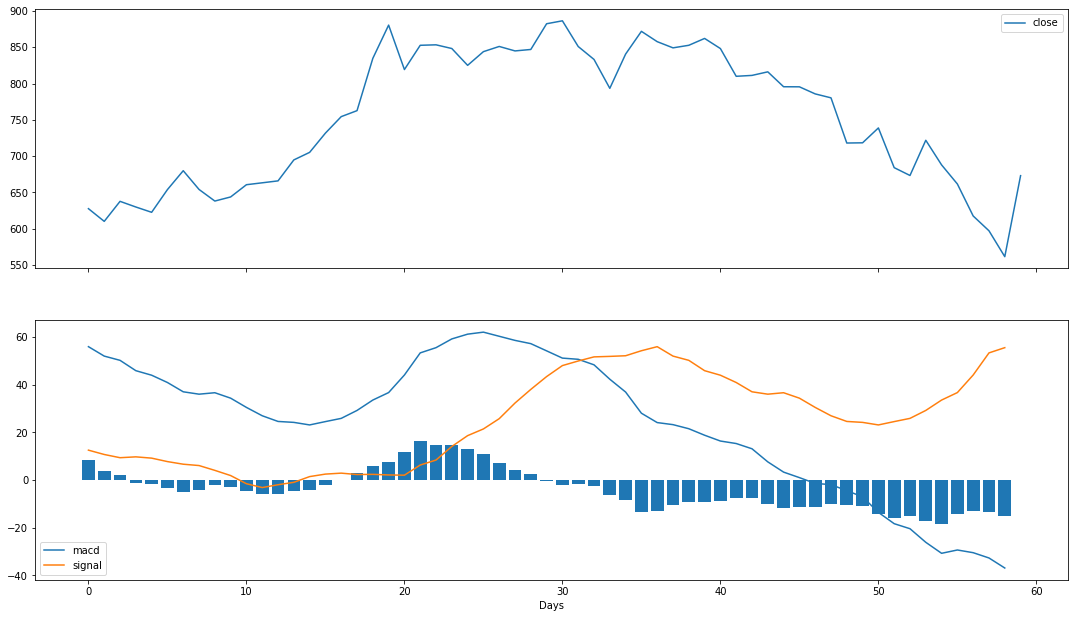

In [4]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

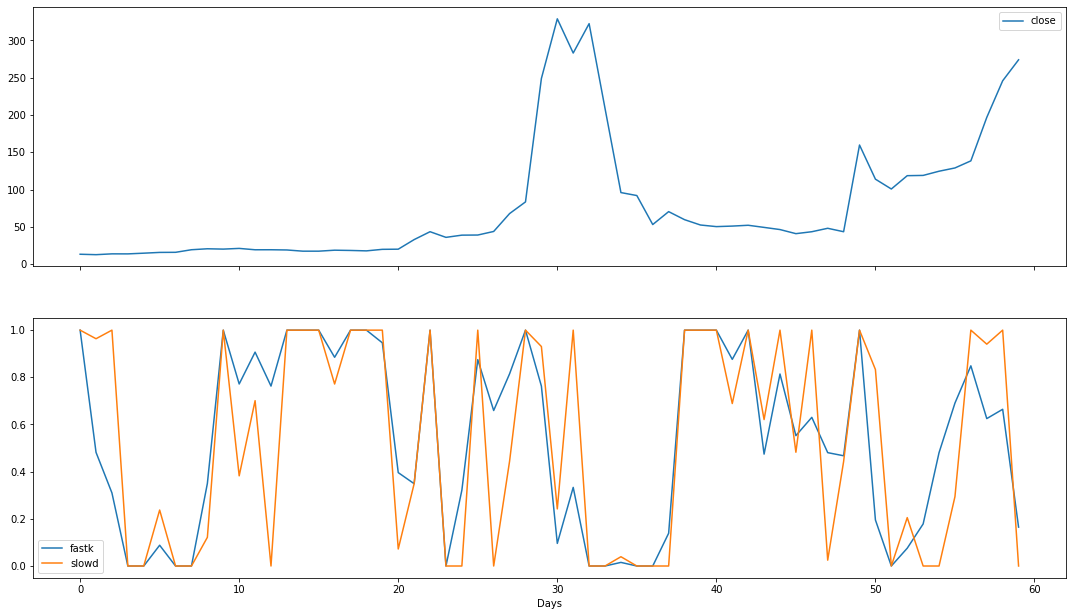

In [9]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)